<a href="https://colab.research.google.com/github/MoroniMenesses/site/blob/main/C%C3%B3pia_de_AnaliseExploratoriaCombustivelBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titulo - Analise exploratória de Combustível no Brasil

## 1.Introdução

AAAAA

## 2.Objetivos

### 2.1. Objetivo Geral:
  Acompanhar a evolução de preços médios de (produto 1) e (produto 2) ao longo da série temporal de 2004 a 2021.

### 2.2. Objetivos Específicos:
Como é a evolução de preços desses produtos em escala nacional?

Como é a evolução de preços desses produtos em escala regional?

Como é a evolução de preços desses produtos em escala estadual (uma região)?

A partir dessas análises, o que muda? Qual região/estado tem maior variação de preços médios? Preço médio min e max?

Nas variações apresentadas, quais as possíveis sugestões para um aumento/diminuição?

## 3.Preparação e Limpeza de Dados

### 3.1. Leitura dos Dados

Primeiro foi realizada a leitura do dataset, que está alocado em um repositório pessoal do GitHub; e importadas as bibliotecas necessárias.

In [43]:
url_gas_tsv = 'https://raw.githubusercontent.com/MoroniMenesses/tec_prog1_Moroni_Bora/main/2004-2021.tsv'

A princípio as bibliotecas utilizadas foram: NumPy e Pandas.


In [44]:
import pandas as pd
import numpy as np

A leitura do *dataset* se deu através do comando **pd.read_csv**, utilizando a variável com o link do *dataset* como parâmetro e tendo como separador a tabulação, uma vez que se trata de um arquivo do tipo **.tsv**.

Abaixo está presente as primeiras cinco linhas do *dataset*, no qual é possível visualizar a estrutura e disposição dos dados de forma crua (sem tratamento).

In [45]:
dataset_gas=pd.read_csv(url_gas_tsv,sep='\t')
dataset_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


Foi feita a conversão do *dataset* em formato **.tsv** para o formato **.csv**.

*<sub>*Apenas para exemplificar uma maneira de converter o formato de um *dataset* para outro.*

In [46]:
dataset_gas.to_csv(r'/content/gas.csv')

### 3.2. Investigação e Limpeza do *Dataset*

Foram obtidas informações preliminares a respeito dos dados presentes no *dataset* através do método **.info()**.

In [47]:
dataset_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Foi observado o tipo *Object* para diversas colunas, inclusive colunas cujos dados são numéricos. Isto nos indicou a necessidade de conversão de algumas dessas colunas para outros tipos.

Além do método acima, aplicamos o (atributo) **.shape** para indentificar o formato do *dataset*.

In [48]:
dataset_gas.shape

(120823, 18)

O *dataset* possui 120823 linhas e 18 colunas.

Outro método utilizado foi o **.describe()** que nos retorna dados estatísticos sobre o *dataset*, como média, desvio-padrão, quartis, entre outros.

In [49]:
dataset_gas.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000
mean,221.066461,11.473440,0.684132,9.977821,13.233902,0.045298
std,387.940239,19.161823,1.403317,16.433783,22.451445,0.024763
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000
25%,39.000000,2.157000,0.075000,1.989000,2.420000,0.029000
50%,99.000000,2.899000,0.121000,2.690000,3.200000,0.041000
75%,226.000000,4.026000,0.204000,3.790000,4.589000,0.058000
max,4167.000000,107.500000,10.748000,100.000000,120.000000,0.395000


O método **.describe()** nos retorna apenas as colunas que possuem dados dos tipos **int/float**. Considerando que o dataset possui 18 colunas, sendo a maioria com dados numéricos, esperava-se que mais colunas aparecessem no resultado do **.describe()**. No entanto, apenas seis colunas foram apresentadas, o que nos levou a questionar a possibilidade de divergência dos tipos de dados presentes na mesma coluna, ou mesmo dados faltantes.

Dessa forma, utilizamos o método **.isna()** aliado ao **.sum()** para identificar as colunas onde poderiam haver números 'NaN' e quantificar esses elementos.

In [50]:
dataset_gas.isna().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

O resultado da análise mostrou que não há colunas com valores 'NaN' - *Not a Number*. Porém isso não condiz com o observado: por que algumas colunas, que possuem valores númericos, estão sendo classificadas como **'Object'**?

Na descrição do *dataset* no Kaggle, existe a seguinte informação:

    *NULL values are now replaces with '-99999.0'*

Portanto, verificamos se há ocorrências deste valor ao longo do *dataset* utilizando o método **.isin()**. Vale ressaltar que encontramos a *string* '-' também sendo utilizada para substituir valores 'NaN' e também foi vericada a ocorrência desta *string*.

In [51]:
buscando_nulos = dataset_gas.isin(['-', '-99999.0'])
resultado = dataset_gas[buscando_nulos]
resultado.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


Ao criar um *dataframe* no qual somente os valores indesejados ('-' e '-99999.0'), NÃO nulos, estão presentes, é possível quantificá-los através da combinação dos métodos **.notna()** e **.sum()**.

In [52]:
resultado.notna().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

Identificamos aproximadamente 9.000 linhas que possuem valores não-definidos.Dessa forma, quanto isto representa em nosso volume total de linhas?

In [53]:
8948 / dataset_gas.shape[0] *100

7.405874709285484

Foi observado que estes valores 'NaN' se encontram em aproximadamente 7,4% das linhas do *dataset*. Assim, foi optado por remover estas linhas já que apresentam dados incompletos e não são uma quantidade expressiva em relação ao todo.

##será que é necessário retirar estas linhas? olhar na análise exploratória##
*olhar se o valor medio de revenda está considerando os impostos

Os valores '-' e '-99999.0' foram substituídos por 'NaN' utilizando o método **.replace()**.

In [54]:
dataset_gas = dataset_gas.replace('-' , np.nan)
dataset_gas = dataset_gas.replace('-99999.0' , np.nan)

In [55]:
dataset_gas.isna().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

Assim, os valores indesejados foram substituídos por 'NaN'. 

Para a remoção desses valores, foi criado um novo *dataframe* para futuras análises e o *dataframe* original será mantido caso seja necessário recuperar os dados.

In [56]:
dataset_gas_limpo = dataset_gas.copy()
dataset_gas_limpo.shape

(120823, 18)

Com o novo *dataframe*, é possível remover as linhas que possuem 'NaN' utilizando o método **.dropna()**. Ao atribuir o **.shape** ao novo *dataframe* é possível observar a redução do número de linhas correspondente aos 7,4% calculados anteriormente.

In [57]:
dataset_gas_limpo = dataset_gas_limpo.dropna()
dataset_gas_limpo.shape

(111875, 18)

Foi aplicado o método **.info()** a fim de conferir se os tipos de dados das colunas novamente.

In [58]:
dataset_gas_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Vimos que as colunas:

        -'MARGEM MÉDIA REVENDA',
        -'PREÇO MÉDIO DISTRIBUIÇÃO',
        -'DESVIO PADRÃO DISTRIBUIÇÃO', 
        -'PREÇO MÍNIMO DISTRIBUIÇÃO',
        -'PREÇO MÁXIMO DISTRIBUIÇÃO', 
        -'COEF DE VARIAÇÃO DISTRIBUIÇÃO',

Ainda estavam com o tipo *'Object'*. Desta forma, uma mudança para o tipo *'Float'* será feita:

In [59]:
cols = ['MARGEM MÉDIA REVENDA',
        'PREÇO MÉDIO DISTRIBUIÇÃO',
        'DESVIO PADRÃO DISTRIBUIÇÃO', 
        'PREÇO MÍNIMO DISTRIBUIÇÃO',
        'PREÇO MÁXIMO DISTRIBUIÇÃO', 
        'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
]
for coluna in cols:
  dataset_gas_limpo[coluna]=dataset_gas_limpo[coluna].astype(float)

Aplicando o **.info()** novamente, viu-se que:

In [60]:
dataset_gas_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

Feito isso, adequamos os tipos de dados *'Object'* das colunas selecionadas para *'Float'*.

Verificamos a ocorrência de duplicatas nas linhas do *dataframe*, pois não há sentido em haver dados duplicados, visto que se trata de um *dataset* contendo uma série temporal.



In [61]:
dataset_gas_limpo.duplicated().sum()

0

A série temporal apresentada no *dataset* é semanal. Desta forma, criamos um "Calendário", no qual foi extraída a informação de dia, mês e ano e explicitada em colunas para cada um dos dados.

_______

Definindo as funções necessárias:

*Split_data*: pega o valor da coluna de datas e separa em uma lista [ano, mes dia]

*extrair_lista*: cria listas com ano, mes e dia separadamente para uso futuro 

In [62]:
def split_data(coluna,caracter_separador):
  lista_split=coluna.str.split(caracter_separador)
  return(lista_split)

def extrair_lista(lista,indice):
  lista_construida=[]
  for i in range(0,len(lista)):
    lista_construida.append(int(lista[i][indice]))
  return lista_construida

Aplicando as funções acima e em variáveis de armazenamento

In [63]:
separados_dias_anos_inicial=split_data(dataset_gas_limpo['DATA INICIAL'],'-')

separados_dias_anos_final=split_data(dataset_gas_limpo['DATA FINAL'],'-')

separados_dias_anos_final

0         [2004, 05, 15]
1         [2004, 05, 15]
2         [2004, 05, 15]
3         [2004, 05, 15]
4         [2004, 05, 15]
               ...      
115879    [2020, 08, 22]
115880    [2020, 08, 22]
115881    [2020, 08, 22]
115882    [2020, 08, 22]
115883    [2020, 08, 22]
Name: DATA FINAL, Length: 111875, dtype: object

In [64]:
# anos_inicial=extrair_lista(separados_dias_anos_inicial,0)
# meses_inicial=extrair_lista(separados_dias_anos_inicial,1)
# dias_inicial=extrair_lista(separados_dias_anos_inicial,2)
# anos_final=extrair_lista(separados_dias_anos_final,0)
# meses_final=extrair_lista(separados_dias_anos_final,1)
# dias_final=extrair_lista(separados_dias_anos_final,2)


Colocar as listas no dataframe




In [65]:
# dataset_gas_limpo['DIA INICIAL']=dias_inicial
# dataset_gas_limpo['MES INICIAL']=meses_inicial
# dataset_gas_limpo['ANO INICIAL']=anos_inicial
# dataset_gas_limpo['DIA FINAL']=dias_final
# dataset_gas_limpo['MES FINAL']=meses_final
# dataset_gas_limpo['ANO FINAL']=anos_final

_________

Isto foi feito utilizando a função **.to_datetime** do próprio Pandas:

In [66]:
dataset_gas_limpo['DIA INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.day
dataset_gas_limpo['MES INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.month
dataset_gas_limpo['ANO INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce', ).dt.year
dataset_gas_limpo['SEMANA INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.week

dataset_gas_limpo['DIA FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.day
dataset_gas_limpo['MES FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.month
dataset_gas_limpo['ANO FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.year
dataset_gas_limpo['SEMANA FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.week

<ipython-input-66-a1c81358fe2e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset_gas_limpo['SEMANA INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.week
<ipython-input-66-a1c81358fe2e>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset_gas_limpo['SEMANA FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.week


Após aplicarmos a função no *dataframe*, as novas colunas criadas foram inseridas.

In [67]:
dataset_gas_limpo.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,...,0.96660,0.133,9,5,2004,19,15,5,2004,20
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,...,1.05000,0.115,9,5,2004,19,15,5,2004,20
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,...,1.16100,0.098,9,5,2004,19,15,5,2004,20
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,...,1.22242,0.143,9,5,2004,19,15,5,2004,20
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,...,1.03170,0.082,9,5,2004,19,15,5,2004,20


As colunas foram reordenadas a fim de melhor compreensão dos dados, no qual dados referentes a datas venham em sequência. O atributo **.columns** foi utilizado para extrair o nome das colunas e em seguida foi feito um **.reindex()** para ordena-las na sequência desejada.

In [68]:
dataset_gas_limpo.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'DIA INICIAL', 'MES INICIAL', 'ANO INICIAL', 'SEMANA INICIAL',
       'DIA FINAL', 'MES FINAL', 'ANO FINAL', 'SEMANA FINAL'],
      dtype='object')

In [69]:
cols = ['DATA INICIAL', 
        'DIA INICIAL', 
        'MES INICIAL', 
        'ANO INICIAL', 
        'SEMANA INICIAL',
        'DATA FINAL',
        'DIA FINAL', 
        'MES FINAL', 
        'ANO FINAL', 
        'SEMANA FINAL',
        'REGIÃO', 
        'ESTADO', 
        'PRODUTO',
        'NÚMERO DE POSTOS PESQUISADOS', 
        'UNIDADE DE MEDIDA',
        'PREÇO MÉDIO REVENDA', 
        'DESVIO PADRÃO REVENDA', 
        'PREÇO MÍNIMO REVENDA',
        'PREÇO MÁXIMO REVENDA', 
        'MARGEM MÉDIA REVENDA',
        'COEF DE VARIAÇÃO REVENDA', 
        'PREÇO MÉDIO DISTRIBUIÇÃO',
        'DESVIO PADRÃO DISTRIBUIÇÃO', 
        'PREÇO MÍNIMO DISTRIBUIÇÃO',
        'PREÇO MÁXIMO DISTRIBUIÇÃO', 
        'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
]

dataset_gas_limpo = dataset_gas_limpo.reindex(columns=cols)

dataset_gas_limpo.head()

,DATA INICIAL,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DATA FINAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,...,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


O próximo ponto de investigação dos dados é referente às colunas do tipo *'Object'*, uma vez que possuem *strings* e essas podem conter divergências, por exemplo a mesma palavra escrita de forma errada.

Analisando os valores únicos das colunas:

- REGIÃO
- ESTADO
- PRODUTO
- UNIDADE DE MEDIDA

O método **.unique()** permite extrair valores únicos de cada coluna, assim é possível identificar se há discrepâncias.

In [70]:
dataset_gas_limpo['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

In [71]:
dataset_gas_limpo['ESTADO'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [72]:
dataset_gas_limpo['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10'], dtype=object)

In [73]:
dataset_gas_limpo['UNIDADE DE MEDIDA'].unique()

array(['R$/l', 'R$/13Kg', 'R$/m3'], dtype=object)

Analisando os valores únicos das colunas, fizemos as seguintes modificações:

- REGIÃO
  - Não houve.
- ESTADO
  - Modificação para siglas a fim de simplificação.
- PRODUTO
  - Padronização de palavras.
- UNIDADE DE MEDIDA
  - Não houve.

A primeira modificação foi referente à mudança dos nomes dos estados/unidade federativa para suas respectivas siglas. Isto foi feito utilizando um dicionário e a função **.map()**.

In [74]:
estado = {'DISTRITO FEDERAL': 'DF',
          'GOIAS': 'GO',
          'MATO GROSSO': 'MT',
          'MATO GROSSO DO SUL': 'MS',
          'ALAGOAS': 'AL',
          'BAHIA': 'BA',
          'CEARA': 'CE',
          'MARANHAO': 'MA',
          'PARAIBA': 'PB',
          'PERNAMBUCO': 'PE',
          'PIAUI': 'PI',
          'RIO GRANDE DO NORTE': 'RN',
          'SERGIPE': 'SE',
          'ACRE': 'AC',
          'AMAPA': 'AP',
          'AMAZONAS': 'AM',
          'PARA': 'PA',
          'RONDONIA': 'RO',
          'RORAIMA': 'RR',
          'TOCANTINS': 'TO',
          'ESPIRITO SANTO': 'ES',
          'MINAS GERAIS': 'MG',
          'RIO DE JANEIRO': 'RJ',
          'SAO PAULO': 'SP',
          'PARANA': 'PR',
          'RIO GRANDE DO SUL': 'RS',
          'SANTA CATARINA': 'SC'
}
dataset_gas_limpo['ESTADO'] = dataset_gas_limpo['ESTADO'].map(estado)

Para os nomes iguais, porém com alguma divergência na escrita, foi utilizado o método **.replace()**, como no caso do 'Óleo Diesel' e 'Oleo Diesel'.

In [75]:
dataset_gas_limpo = dataset_gas_limpo.replace('ÓLEO DIESEL' , 'OLEO DIESEL')
dataset_gas_limpo = dataset_gas_limpo.replace('ÓLEO DIESEL S10' , 'OLEO DIESEL S10')
dataset_gas_limpo['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'OLEO DIESEL',
       'OLEO DIESEL S10'], dtype=object)

Após a investigação e limpeza, a versão final do *dataframe* se apresenta da seguinte forma:

In [76]:
dataset_gas_limpo.head()

,DATA INICIAL,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DATA FINAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,...,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


## 4.0 ANÁLISE EXPLORATÓRIA

In [77]:
selected_rows = dataset_gas_limpo[dataset_gas['UNIDADE DE MEDIDA'] == 'R$/m3']
selected_rows.head()

<ipython-input-77-52e263dd2a2a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_rows = dataset_gas_limpo[dataset_gas['UNIDADE DE MEDIDA'] == 'R$/m3']


,DATA INICIAL,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DATA FINAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,...,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
36196,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.000,1.099,1.099,0.257,0.000,0.842,0.011,0.8347,0.8546,0.013
36197,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.000,1.084,1.084,0.295,0.000,0.789,0.000,0.7888,0.7888,0.000
36198,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.000,1.079,1.079,0.374,0.000,0.705,0.136,0.4214,0.8031,0.193
36199,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.001,1.180,1.184,0.354,0.001,0.830,0.096,0.6811,0.9982,0.116
36200,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.000,1.149,1.149,0.357,0.000,0.792,0.098,0.6827,0.9071,0.124


---

SAIBA MAIS

In [78]:
# OBSERVAÇÃO
# Antes de removermos as linhas NaN, nós tentamos inicialmente substituir seus valores por None. 
# Curiosamente quando realizamos um replace para None, estes valores acabam recebendo o valor da linha superior. 
# Vamos fazer um exemplo pequeno e prático abaixo

# '-999999.0'
# dataset_gas.iloc[120764]

# '-'
# dataset_gas.iloc[1903]

# '-999999.0'
# dataset_gas.iloc[120768, 15]

In [79]:
data = [['-', 2, 3], [4, '-', 6], [7, 8, '-']]

df = pd.DataFrame(data, columns=["A", "B", "C"])
df

,A,B,C
0,-,2,3
1,4,-,6
2,7,8,-


In [80]:
df = df.replace('-', None)
df

,A,B,C
0,-,2,3
1,4,2,6
2,7,8,6


---

In [82]:
dataset_gas_limpo.columns

Index(['DATA INICIAL', 'DIA INICIAL', 'MES INICIAL', 'ANO INICIAL',
       'SEMANA INICIAL', 'DATA FINAL', 'DIA FINAL', 'MES FINAL', 'ANO FINAL',
       'SEMANA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [89]:
dataset_precos_analise=dataset_gas_limpo[['ANO INICIAL','PREÇO MÉDIO DISTRIBUIÇÃO']].groupby(['ANO INICIAL'],as_index=False).mean()

In [90]:
dataset_precos_analise

,ANO INICIAL,PREÇO MÉDIO DISTRIBUIÇÃO
0,2004,6.906850
1,2005,6.992300
2,2006,7.461841
3,2007,7.504293
4,2008,7.575823
5,2009,7.721762
6,2010,8.114539
7,2011,8.257765
8,2012,8.207231
9,2013,7.193861


In [88]:
dataset_precos_analise.columns

Index(['PREÇO MÉDIO DISTRIBUIÇÃO'], dtype='object')

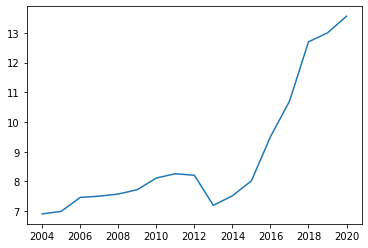

In [92]:
import matplotlib.pyplot as plt

x=dataset_precos_analise['ANO INICIAL']
y=dataset_precos_analise['PREÇO MÉDIO DISTRIBUIÇÃO']

plt.plot(x,y)
plt.show()



In [96]:
dataset_precos_regional=dataset_gas_limpo[['ANO INICIAL','REGIÃO','PREÇO MÉDIO DISTRIBUIÇÃO']].groupby(['ANO INICIAL','REGIÃO'],as_index=False).mean()

dataset_precos_regional

,ANO INICIAL,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
0,2004,CENTRO OESTE,7.757567
1,2004,NORDESTE,6.417150
2,2004,NORTE,8.323009
3,2004,SUDESTE,5.852190
4,2004,SUL,6.110182
...,...,...,...
80,2020,CENTRO OESTE,13.555991
81,2020,NORDESTE,12.473497
82,2020,NORTE,17.054205
83,2020,SUDESTE,11.476324


In [97]:
dataset_precos_nordeste=dataset_precos_regional[dataset_precos_regional['REGIÃO']=='NORDESTE']
dataset_precos_nordeste

,ANO INICIAL,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
1,2004,NORDESTE,6.417150
6,2005,NORDESTE,6.420467
11,2006,NORDESTE,6.964898
16,2007,NORDESTE,6.930525
21,2008,NORDESTE,6.994549
26,2009,NORDESTE,7.120704
31,2010,NORDESTE,7.298358
36,2011,NORDESTE,7.303776
41,2012,NORDESTE,7.066796
46,2013,NORDESTE,5.604876


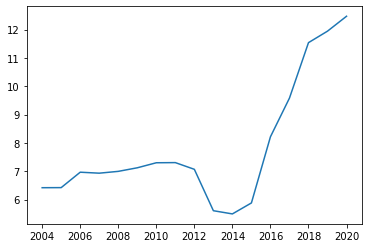

In [98]:
x=dataset_precos_nordeste['ANO INICIAL']
y=dataset_precos_nordeste['PREÇO MÉDIO DISTRIBUIÇÃO']

plt.plot(x,y)
plt.show()

In [99]:
dataset_precos_norte=dataset_precos_regional[dataset_precos_regional['REGIÃO']=='NORTE']
dataset_precos_norte

,ANO INICIAL,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
2,2004,NORTE,8.323009
7,2005,NORTE,8.470986
12,2006,NORTE,8.781770
17,2007,NORTE,8.973714
22,2008,NORTE,9.130082
27,2009,NORTE,9.175562
32,2010,NORTE,9.660253
37,2011,NORTE,9.926359
42,2012,NORTE,9.884348
47,2013,NORTE,8.794988


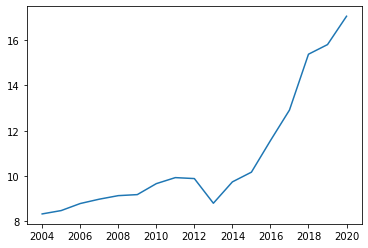

In [100]:
x=dataset_precos_norte['ANO INICIAL']
y=dataset_precos_norte['PREÇO MÉDIO DISTRIBUIÇÃO']

plt.plot(x,y)
plt.show()

In [101]:
dataset_precos_sudeste=dataset_precos_regional[dataset_precos_regional['REGIÃO']=='SUDESTE']
dataset_precos_sudeste

,ANO INICIAL,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
3,2004,SUDESTE,5.852190
8,2005,SUDESTE,5.968332
13,2006,SUDESTE,6.433746
18,2007,SUDESTE,6.505545
23,2008,SUDESTE,6.519544
28,2009,SUDESTE,6.693583
33,2010,SUDESTE,6.902477
38,2011,SUDESTE,7.221676
43,2012,SUDESTE,7.371251
48,2013,SUDESTE,6.524787


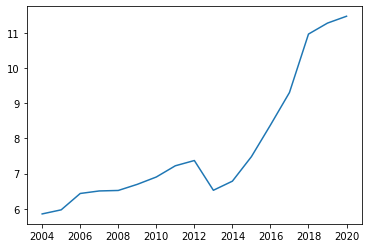

In [102]:
x=dataset_precos_sudeste['ANO INICIAL']
y=dataset_precos_sudeste['PREÇO MÉDIO DISTRIBUIÇÃO']

plt.plot(x,y)
plt.show()

In [103]:
dataset_precos_sul=dataset_precos_regional[dataset_precos_regional['REGIÃO']=='SUL']
dataset_precos_sul

,ANO INICIAL,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
4,2004,SUL,6.110182
9,2005,SUL,6.314620
14,2006,SUL,6.784652
19,2007,SUL,6.850664
24,2008,SUL,7.087099
29,2009,SUL,7.345041
34,2010,SUL,7.613125
39,2011,SUL,7.900056
44,2012,SUL,7.958402
49,2013,SUL,7.370832


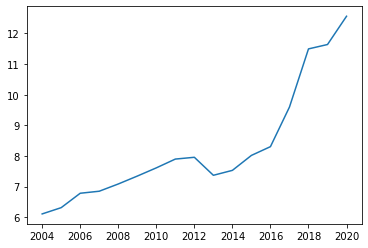

In [104]:
x=dataset_precos_sul['ANO INICIAL']
y=dataset_precos_sul['PREÇO MÉDIO DISTRIBUIÇÃO']

plt.plot(x,y)
plt.show()

In [105]:
dataset_precos_centroeste=dataset_precos_regional[dataset_precos_regional['REGIÃO']=='CENTRO OESTE']
dataset_precos_centroeste

,ANO INICIAL,REGIÃO,PREÇO MÉDIO DISTRIBUIÇÃO
0,2004,CENTRO OESTE,7.757567
5,2005,CENTRO OESTE,7.833091
10,2006,CENTRO OESTE,8.275224
15,2007,CENTRO OESTE,8.239521
20,2008,CENTRO OESTE,8.123553
25,2009,CENTRO OESTE,8.433205
30,2010,CENTRO OESTE,9.639046
35,2011,CENTRO OESTE,9.388920
40,2012,CENTRO OESTE,9.479673
45,2013,CENTRO OESTE,8.966085


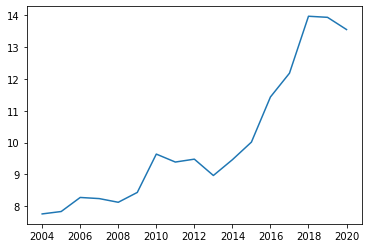

In [106]:
x=dataset_precos_centroeste['ANO INICIAL']
y=dataset_precos_centroeste['PREÇO MÉDIO DISTRIBUIÇÃO']

plt.plot(x,y)
plt.show()